In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt

선형 회귀의 결과와 원본 그래프를 비교하기 위해  
tensorflow 외에도 matplotlib.pyplot를 추가한다.  


In [26]:
x_data = [0,1,2,3,4,5]
y_data = [1,3,5,7,9,11]

  
x_data 와 y_data를 입력해주고 plot함수로 먼저 함수를 그려본다.  

<function matplotlib.pyplot.show(*args, **kw)>

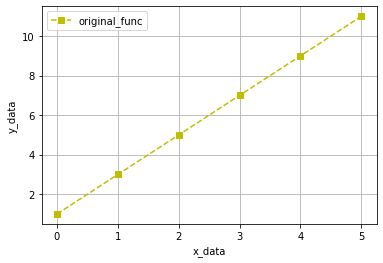

In [46]:
plt.plot(x_data,y_data,'ys--', label = 'original_func')
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.legend()
plt.grid(True)
plt.show

이제 텐서플로우로 선형회귀를 구현해보자.  

선형 회귀의 시작은 선형이라는 가설이다.  
다음은 기울기(W)와 절편(b)를 정의하고 선형 함수를 정의하는 코드이다.

In [47]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

#hypothesis
hypo =W * x_data + b

이제 비용함수를 정의해야 한다.

아래 수식은 선형 회귀의 비용 함수이다.  
$$cost(W,b) = {1\over m} \sum_{i=1}^m (H(x_i) - y_i)^2$$  

선형 회귀에서 비용 함수는 "차(diff)의 제곱의 평균" 이라고 풀어서 말할 수 있다.  
두 값의 "차" 가 아닌 "차의 제곱" 인 이유는  
1. 음수 값 처리  
2. diff가 증가할수록 cost는 제곱으로 증가하여 더 높은 penalty 부여  

라고 한다.  

수식은 복잡했지만, 한 줄 코드로 간단하게 cost함수를 정의할 수 있다.

In [49]:
#cost function
cost = tf.reduce_mean(tf.square(hypo - y_data))

다음은 cost함수를 최소화하는 node를 생성하는 코드이다.

In [50]:
#Minimize code
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

경사 하강법으로 가장 작은 비용을 찾겠다는 코드이다.  
경사 하강법을 풀어서 적기에는 너무 오래 거릴 것 같아서 나만의 언어로 다시 정리를 해 보았다.  

차의 제곱의 평균은 아래로 볼록한 2차 함수꼴이다.  
고등학교 수학시간에 배웠던 미분을 아래로 볼록한 2차 함수에 적용했을때  
미분 값이 '0'이되는 지점(기울기가 '0')은 2차 함수의 최소값 이라는 것을 배웠던 기억이 난다.  

그래서 경사 하강법은 아래로 볼록한 2차 함수의 특정 지점에서 점점 내려 오면서 미분 값이 '0'이 되는 지점을, 혹은 0에 가장 근접한 지점을 찾겠다는 분석 방법 이라고 내 마음대로 정리하고 머리에 넣었다.  


위 코드에서 "GradientDescentOptimizer"의 "minimize"는 바로 위에서 언급한 과정이 수행되는 과정이고, train이 한번 실행될 때 마다, cost가 조금 더 0에 가까운 W와 b로 값이 변하게 된다.  

이제 지금까지 만든 그래프로 학습을 시킨 후 맨 처음 함수와 비교 해보자!  


In [51]:
#구현한 그래프를 실행시키기 위한 세션을 정의
sess = tf.Session()
#미리 정의했던 Variable인'W'와 'b'를 초기화 하기위한 과정 수행
sess.run(tf.global_variables_initializer())

In [52]:
#학습 결과 확인
train_cnt = 5001
for step in range(train_cnt):
    sess.run(train)
    #50번의 트레이닝 마다 학습결과 출력
    if step % 200 == 0:
        print('cnt : ',step,' 비용 : ', sess.run(cost), ' W: ',sess.run(W), ' b: ', sess.run(b))

단계 :  0  비용 :  28.020678  W:  [0.84018993]  b:  [-1.0093745]
단계 :  200  비용 :  0.07238181  W:  [2.1342516]  b:  [0.5236113]
단계 :  400  비용 :  0.0067609157  W:  [2.0410306]  b:  [0.8544039]
단계 :  600  비용 :  0.0006315078  W:  [2.0125399]  b:  [0.9555024]
단계 :  800  비용 :  5.898777e-05  W:  [2.0038326]  b:  [0.9864005]
단계 :  1000  비용 :  5.5106048e-06  W:  [2.0011716]  b:  [0.9958434]
단계 :  1200  비용 :  5.153241e-07  W:  [2.0003586]  b:  [0.998729]
단계 :  1400  비용 :  4.8380418e-08  W:  [2.0001097]  b:  [0.9996104]
단계 :  1600  비용 :  4.5978847e-09  W:  [2.0000336]  b:  [0.9998798]
단계 :  1800  비용 :  4.3730175e-10  W:  [2.0000107]  b:  [0.999963]
단계 :  2000  비용 :  6.813868e-11  W:  [2.0000045]  b:  [0.9999858]
단계 :  2200  비용 :  2.800545e-11  W:  [2.000003]  b:  [0.9999909]
단계 :  2400  비용 :  2.800545e-11  W:  [2.000003]  b:  [0.9999909]
단계 :  2600  비용 :  2.800545e-11  W:  [2.000003]  b:  [0.9999909]
단계 :  2800  비용 :  2.800545e-11  W:  [2.000003]  b:  [0.9999909]
단계 :  3000  비용 :  2.800545e-11  W:  [

간단한 모델이여서 그런지 2200번 정도의 학습을 하니 그 뒤로는 비용과 W, b의 값이 변하지 않는다. (그래도 어느정도 여유를 주고 학습을 시키는 것이 좋다고 한다.)  

학습한 모델을 처음 그래프와 비교 해보자.


<function matplotlib.pyplot.show(*args, **kw)>

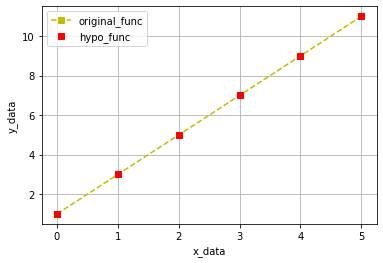

In [68]:
#tensor객체에서 값을 빼오기위해 변수 선언
W_v = sess.run(W)[0]
b_v = sess.run(b)[0]


plt.plot(x_data,y_data,'ys--', label = 'original_func')
plt.plot(x_data,list(map(lambda x : W_v*x + b_v,x_data)),'rs', label = 'hypo_func')
#lambda 와 map을 사용하여 학습 결과를 출력

plt.xlabel('x_data')
plt.ylabel('y_data')
plt.legend()
plt.grid(True)

plt.show

정말 간단한 모델이여서 그런지 정확하게 학습 된 결과를 볼 수 있다.  
하지만 선형 회귀는 실 생활에 많이 적용 할 수가 없다고 한다.  
앞으로 더 열심히, 많이 공부 해야겠다.  

오늘 공부 끝~